# 2. Importing Library

In [18]:
# First we will import the necessary Library 


import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pickle

# 3. Loading Dataset

In [19]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('XRP-USD.csv')

In [20]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1969
Total number of fields present in the dataset:  7


In [21]:
maindf.shape

(1969, 7)

In [22]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
1,2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2,2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
3,2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
4,2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000


In [23]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1964,2023-03-27,0.448841,0.487613,0.443896,0.479991,0.479991,2730255979
1965,2023-03-28,0.480074,0.529756,0.470201,0.515058,0.515058,3163217119
1966,2023-03-29,0.515005,0.580400,0.514962,0.543577,0.543577,4092945977
1967,2023-03-30,0.543669,0.554223,0.527192,0.534249,0.534249,2694676898
1968,2023-03-31,0.533564,0.546672,0.528609,0.533862,0.533862,1871339136


In [24]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1969 non-null   object 
 1   Open       1969 non-null   float64
 2   High       1969 non-null   float64
 3   Low        1969 non-null   float64
 4   Close      1969 non-null   float64
 5   Adj Close  1969 non-null   float64
 6   Volume     1969 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 107.8+ KB


In [25]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1.969000e+03
mean,0.518317,0.540773,0.494475,0.518485,0.518485,2.545156e+09
std,0.357248,0.386919,0.328081,0.357171,0.357171,3.568587e+09
min,0.140524,0.146911,0.115093,0.139635,0.139635,1.002940e+08
25%,0.290301,0.299947,0.278829,0.290246,0.290246,8.751262e+08
50%,0.388186,0.399634,0.377618,0.388266,0.388266,1.497590e+09
75%,0.646703,0.679158,0.618451,0.646474,0.646474,2.626496e+09
max,3.363570,3.841940,3.117340,3.377810,3.377810,3.695518e+10


# Checking for Null Values

In [26]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [27]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [28]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(1969, 7)

In [29]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2023-03-30')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2017-11-09,0.217911,0.221791,0.214866,0.217488
1,2017-11-10,0.218256,0.219068,0.205260,0.206483
2,2017-11-11,0.205948,0.214456,0.205459,0.210430
3,2017-11-12,0.210214,0.210214,0.195389,0.197339
4,2017-11-13,0.197472,0.204081,0.197456,0.203442
...,...,...,...,...,...
1963,2023-03-26,0.444675,0.462962,0.442772,0.448817
1964,2023-03-27,0.448841,0.487613,0.443896,0.479991
1965,2023-03-28,0.480074,0.529756,0.470201,0.515058
1966,2023-03-29,0.515005,0.580400,0.514962,0.543577


In [30]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,0.642976,0.637172
February,0.532238,0.531225
March,0.488765,0.488166
April,0.627147,0.635044
May,0.611959,0.606522
June,0.472595,0.468221
July,0.397498,0.397912
August,0.461517,0.463128
September,0.470399,0.471303


In [31]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [32]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1969, 2)


In [33]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 5 Year

In [34]:
closedf = closedf[closedf['Date'] > '2021-11-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  515


In [35]:
closedf

,Date,Close
1454,2021-11-02,1.136196
1455,2021-11-03,1.208796
1456,2021-11-04,1.202003
1457,2021-11-05,1.161533
1458,2021-11-06,1.152454
...,...,...
1964,2023-03-27,0.479991
1965,2023-03-28,0.515058
1966,2023-03-29,0.543577
1967,2023-03-30,0.534249


In [36]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [37]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(515, 1)


* ### Slicing data into Training set and Testing set

In [38]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (309, 1)
test_data:  (206, 1)


In [39]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [40]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (293, 15)
y_train:  (293,)
X_test:  (190, 15)
y_test (190,)


In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (293, 15, 1)
X_test:  (190, 15, 1)


* # Actuall Model Building

In [42]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [43]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
10/10 [==============================] - 2s 42ms/step - loss: 0.1522 - val_loss: 0.0086
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1270 - val_loss: 0.0054
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1057 - val_loss: 0.0032
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0886 - val_loss: 0.0021
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0697 - val_loss: 0.0028
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0515 - val_loss: 0.0052
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0354 - val_loss: 0.0082
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0227 - val_loss: 0.0115
Epoch 9/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0136 - val_loss: 0.0104
Epoch 10/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.0039
Epoch 11

- ### Plotting Loss vs Validation loss 

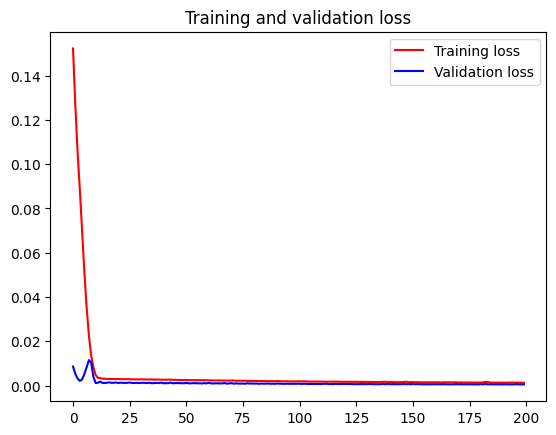

<Figure size 640x480 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [45]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 2ms/step


((293, 1), (190, 1))

- # Model Evaluation

In [46]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [47]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.034666161876617516
Train data MSE:  0.0012017427792558495
Train data MAE:  0.023069990789778
-------------------------------------------------------------------------------------
Test data RMSE:  0.021928236168470144
Test data MSE:  0.00048084754146020215
Test data MAE:  0.01356072079964688


- ## Variance Regression Score

In [48]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9767067077917768
Test data explained variance regression score: 0.8087178919606879


- ## R square score for regression

In [49]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9766624616289632
Test data R2 score: 0.8014739422455862


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [50]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0028898360580346463
Test data MGD:  0.0026551664687695705
----------------------------------------------------------------------
Train data MPD:  0.0017744781977832775
Test data MPD:  0.0011238988704800996


In [51]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (515, 1)
Test predicted data:  (515, 1)


- # Predicting next 30 days

In [52]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 7
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  7


- # Plotting last 15 days of dataset and next predicted 30 days

In [53]:
print(lst_output[2])
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[0.2270069122314453]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22]


In [54]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
fbitfile= open("xrp.txt", "wb")
pickle.dump((next_predicted_days_value),fbitfile)
fbitfile.close()


- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [55]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()